In [1]:
import sys
from functools import partial
from zipfile import ZipFile
import pandas as pd
sys.path.append('../src')
%matplotlib inline

# Your contact details

In [2]:
# If you're having problem importing this file, copy and paste the contents of "uatt.py" in this cell instead
# of the import statement
from uatt import submit
my_submit = partial(submit, "Uri Goren", "Company", "uri@uatt.org.il", "050")

# Read data

In [3]:
data = []
with ZipFile("../data/data.zip") as z:
    for fname in z.namelist():
        if not fname.endswith('.txt') or not fname.startswith('data'):
            continue
        content = z.read(fname).decode('utf8')
        label, idx = fname[5:-4].split('-', 1)
        data.append((idx,label,content,))
df_train = pd.DataFrame(data, columns=("id", "label", "content"))
df_train.sample(10)

,id,label,content
2756,21400,rsu,Exhibit 10.8 \n\nEmployee \n\n\n\nTHIS AGREEME...
128,01290,SPA,\n\n\n \n\n\nExhibit 99.1\n\n \n\n\n\n\n ...
4146,35300,rsu,\n\n\n \n\n\n \n\n\n \n\n\nExhibit 10.2\n...
2733,21170,rsu,* * *\n\nExhibit 10.1\n\n \n\n\n\n\nFEDERATED...
4136,35200,rsu,"##### \n\nExhibit 10.4 \n\n\nUNDER THE \nPHI,..."
3394,27780,rsu,Exhibit 10.3 \n\n\n\nThis Restricted Stock Agr...
1066,05890,employment,\n\n\n\n\n \n\n\nAGREEMENT entered into thi...
1652,11750,employment,\n\n\n\n\nThis Employment Agreement (the “Ag...
2821,22050,rsu,Exhibit 10.6.3 \n\nLSI CORPORATION \n\n\n\nOn ...
2802,21860,rsu,"Exhibit 10.19\n\nKANBAY INTERNATIONAL, INC.\n\..."


In [4]:
data = []
with ZipFile("../data/test_data.zip") as z:
    for fname in z.namelist():
        content = z.read(fname).decode('utf8')
        if not fname.endswith('.txt') or not fname.startswith('test'):
            continue
        idx = fname[5:-4]
        data.append((idx,content,))
df_test = pd.DataFrame(data, columns=("id", "content"))
df_test.sample(10)

,id,content
489,08438,\n\n\n \n\n\nExhibit 10.2\n\nEXECUTION COPY...
658,38799,* * *\n\n* * *\n\nEXHIBIT 99.3\n\n\n\n \n\n\n...
798,20272,Exhibit 10.3\n\nTHE ALLSTATE CORPORATION\n\n20...
437,05916,EXHIBIT 10.19 \n\n\n\nbetween \n\nPEAK INTERNA...
788,33757,Exhibit 10.1\n\n\n\nPURSUANT TO THE \n\nAMENDE...
632,38411,Exhibit 10.2 \n\n\n\nThis Registration Rights ...
94,19981,"Exhibit 99.1 \n\nFOUNDATION COAL HOLDINGS, INC..."
791,22115,Exhibit 10.6 \n\nSERITAGE GROWTH PROPERTIES \n...
64,08731,\n\n\n\n\nTHIS AGREEMENT is made the 7th day...
136,38219,\n\n\n\n\nTHIS REGISTRATION RIGHTS AGREEMENT...


# Plot distribution of labels

<AxesSubplot:>

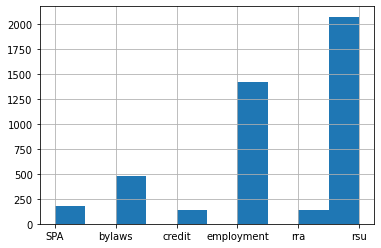

In [5]:
df_train["label"].hist()

# Submit
## Sample submission 1: "All RSU"

In [6]:
# for all documents
df_test["label"] = "rsu"
submission = dict(df_test[["id","label"]].values)
#submission name must be unique
submission_name = "uri_most_likely"
my_submit(submission_name, submission)


0.46958637469586

## Sample submission 2: Submission by string search


In [11]:
df_test["label"] = "rsu"
df_test.loc[df_test["content"].str.contains("EMPLOYMENT"),"label"] = 'employment'
df_test.loc[df_test["content"].str.contains("CREDIT"),"label"] = 'credit'
df_test.loc[df_test["content"].str.contains("BYLAWS"),"label"] = 'bylaws'
df_test.loc[df_test["content"].str.contains("REGISTRAR"),"label"] = 'rra'
submission = dict(df_test[["id","label"]].values)

submission_name = "uri_string_search"
my_submit(submission_name, submission)

0.65085158150852

# See how you rank
Leaderboard is available at:
http://goren.ml/uattcontract

Accuracy of **90%** and above is required to pass the test